# Calculation of the Probability distribution function

The donors were assumed to be at 50nm below the micromagnet. The magnetic field is calculated in a 200nm x 200nm region between the two micromagnets.

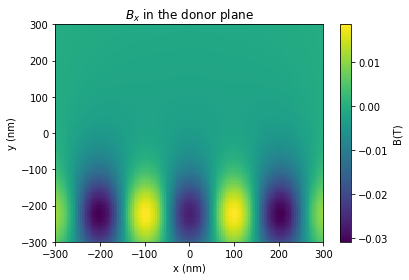

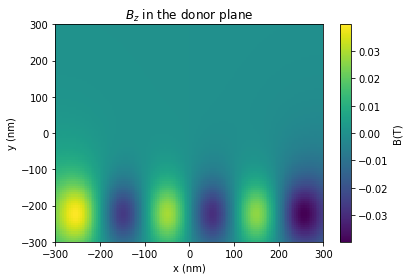

In [98]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset = 'slant.dat'
bxData = np.loadtxt("/Users/sandesh/repos/donor-micromagnet-arch/code/B field data/Bx_"+dataset)
byData = np.loadtxt("/Users/sandesh/repos/donor-micromagnet-arch/code/B field data/By_"+dataset)
bzData = np.loadtxt("/Users/sandesh/repos/donor-micromagnet-arch/code/B field data/Bz_"+dataset)

x = np.linspace(-300,300,bxData.shape[1])
y = np.linspace(-300,300,bxData.shape[0])
XX,YY = np.meshgrid(x,y)

plt.figure(1)
plt.pcolor(XX,YY,bxData)
plt.xlabel("x (nm)")
plt.ylabel("y (nm)")
cbar = plt.colorbar()
cbar.set_label("B(T)")
plt.title(r"$B_x$ in the donor plane")

plt.figure(2)
plt.pcolor(XX,YY,bzData)
plt.xlabel("x (nm)")
plt.ylabel("y (nm)")
cbar = plt.colorbar()
cbar.set_label("B(T)")
plt.title(r"$B_z$ in the donor plane")

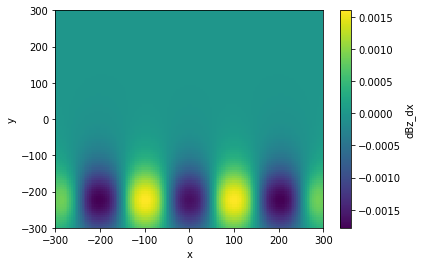

In [99]:
bz_gradient = np.gradient(bzData,2)
plt.pcolor(XX,YY,bz_gradient[1])
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="dBz_dx")

conv_factor (nm) 0.0625


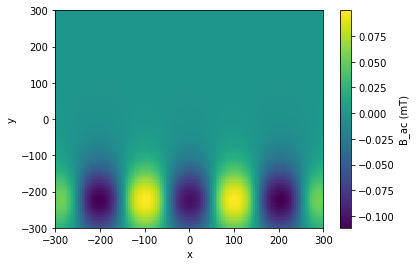

In [108]:
l_orb = 2.5e-9 # nm
Delta = 10e-3 #eV
E_ac = 0.1e6 #V/m

conv_factor = l_orb**2*E_ac/Delta 
print("conv_factor (nm)",conv_factor*1e9)
B_ac = 1e9 * conv_factor * bz_gradient[1]

plt.pcolor(XX,YY,B_ac*1e3)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="B_ac (mT)")



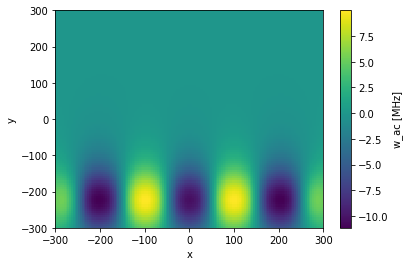

In [109]:
g_mu_b_h = 1e11
w_ac = g_mu_b_h * B_ac 

plt.pcolor(XX,YY,w_ac/1e6)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="w_ac [MHz]")

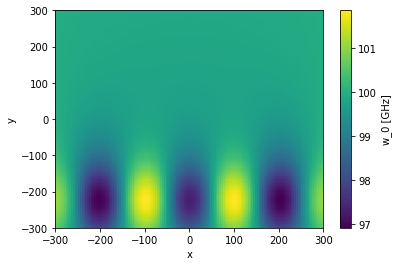

In [110]:
B_ext = 1
B_net = B_ext + bxData
w_0 = g_mu_b_h * B_net

plt.pcolor(XX,YY,w_0/1e9)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="w_0 [GHz]")

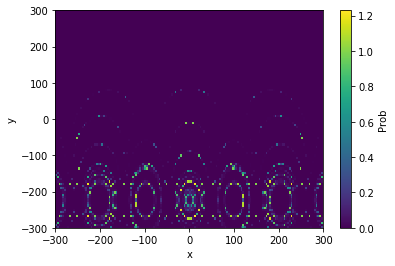

In [138]:
x_positions = np.arange(2,151,10)
P = np.zeros(w_ac.shape)
for x_0 in x_positions:
    y_0 = 20
    P += w_ac*w_ac/(w_ac*w_ac + (w_0[y_0,x_0] - w_0)**2)

plt.pcolor(XX,YY,P)
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Prob")

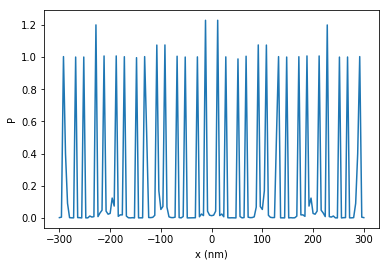

In [139]:
plt.plot(np.linspace(-300,300,P.shape[1]),P[y_0,:])
plt.xlabel("x (nm)")
plt.ylabel("P")

In [87]:
P.sha

(101, 151)